In [ ]:
import cv2
import os
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sklearn.metrics as metrics
from sklearn import svm
from sklearn.svm import LinearSVC, SVC

from PIL import Image, ImageFilter
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, Flatten
from keras.models import Sequential
import plotly.graph_objects as go
import plotly.express as ex

import skimage as ski
from skimage.io import imread
from skimage.transform import resize
from sklearn.decomposition import PCA

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
zip_files = ['test1','train']

for zip_file in zip_files:
    with zipfile.ZipFile("C:/Users/USER/OneDrive/Desktop/prodigy/{}.zip".format(zip_file),"r") as z :
        z.extractall(".")
        print("{} unzipped".format(zip_file))

test1 unzipped
train unzipped


In [3]:
TRAIN_DIR_PATH = "./train/"
file_names = os.listdir(TRAIN_DIR_PATH)
print("There are {} no. of images in directory".format(len(file_names)))

There are 25000 no. of images in directory


In [4]:
IMAGE_FOLDER_PATH = r"C:/Users/USER/OneDrive/Desktop/prodigy/train/train"
FILE_NAMES = os.listdir(IMAGE_FOLDER_PATH)

In [5]:
targets = list()
full_paths = list()
train_cats_dir = list()
train_dogs_dir = list()

for file_name in FILE_NAMES:
    target = file_name.split(".")[0]
    full_path = os.path.join(IMAGE_FOLDER_PATH, file_name)
    
    if(target=="dog"):
        train_dogs_dir.append(full_path)
        
    if(target=="cat"):
        train_cats_dir.append(full_path)
    
    full_paths.append(full_path)
    targets.append(target)

dataset = pd.DataFrame()
dataset['image_path'] = full_paths
dataset['target'] = targets

In [6]:
train_cats_dir[:5]

['C:/Users/USER/OneDrive/Desktop/prodigy/train/train\\cat.0.jpg',
 'C:/Users/USER/OneDrive/Desktop/prodigy/train/train\\cat.1.jpg',
 'C:/Users/USER/OneDrive/Desktop/prodigy/train/train\\cat.10.jpg',
 'C:/Users/USER/OneDrive/Desktop/prodigy/train/train\\cat.100.jpg',
 'C:/Users/USER/OneDrive/Desktop/prodigy/train/train\\cat.1000.jpg']

In [7]:
train_dogs_dir[:10]

['C:/Users/USER/OneDrive/Desktop/prodigy/train/train\\dog.0.jpg',
 'C:/Users/USER/OneDrive/Desktop/prodigy/train/train\\dog.1.jpg',
 'C:/Users/USER/OneDrive/Desktop/prodigy/train/train\\dog.10.jpg',
 'C:/Users/USER/OneDrive/Desktop/prodigy/train/train\\dog.100.jpg',
 'C:/Users/USER/OneDrive/Desktop/prodigy/train/train\\dog.1000.jpg',
 'C:/Users/USER/OneDrive/Desktop/prodigy/train/train\\dog.10000.jpg',
 'C:/Users/USER/OneDrive/Desktop/prodigy/train/train\\dog.10001.jpg',
 'C:/Users/USER/OneDrive/Desktop/prodigy/train/train\\dog.10002.jpg',
 'C:/Users/USER/OneDrive/Desktop/prodigy/train/train\\dog.10003.jpg',
 'C:/Users/USER/OneDrive/Desktop/prodigy/train/train\\dog.10004.jpg']

In [8]:
dataset.head(10)

,image_path,target
0,C:/Users/USER/OneDrive/Desktop/prodigy/train/t...,cat
1,C:/Users/USER/OneDrive/Desktop/prodigy/train/t...,cat
2,C:/Users/USER/OneDrive/Desktop/prodigy/train/t...,cat
3,C:/Users/USER/OneDrive/Desktop/prodigy/train/t...,cat
4,C:/Users/USER/OneDrive/Desktop/prodigy/train/t...,cat
5,C:/Users/USER/OneDrive/Desktop/prodigy/train/t...,cat
6,C:/Users/USER/OneDrive/Desktop/prodigy/train/t...,cat
7,C:/Users/USER/OneDrive/Desktop/prodigy/train/t...,cat
8,C:/Users/USER/OneDrive/Desktop/prodigy/train/t...,cat
9,C:/Users/USER/OneDrive/Desktop/prodigy/train/t...,cat


In [9]:
len(dataset)

25000

In [10]:
dataset.shape

(25000, 2)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  25000 non-null  object
 1   target      25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB


In [12]:
print("Total data counts : ", dataset['target'].count())
counts = dataset['target'].value_counts()
print(counts)

Total data counts :  25000
target
cat    12500
dog    12500
Name: count, dtype: int64


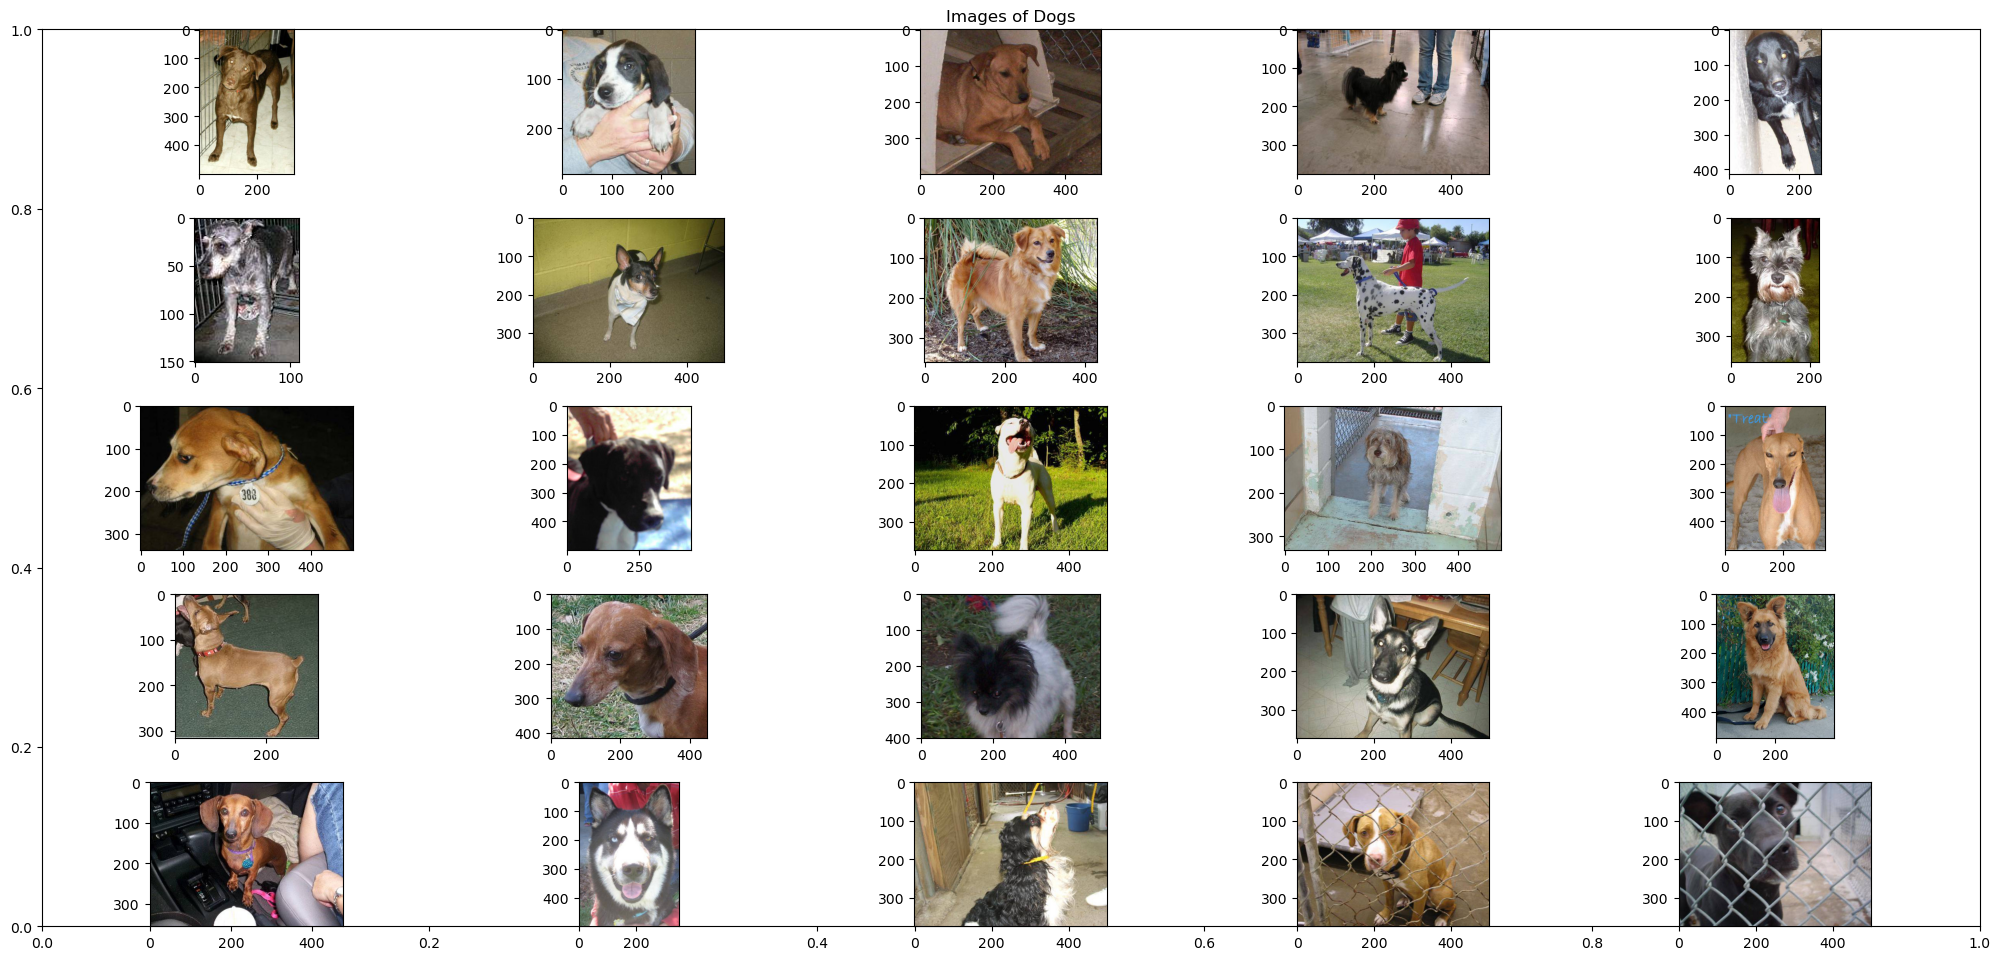

In [13]:
rows = 5
cols = 5
axes = []
fig = plt.figure(figsize=(20,10))
i = 1
plt.title("Images of Dogs")

for a in range(rows*cols):
    b = mpimg.imread(train_dogs_dir[i])
    axes.append(fig.add_subplot(rows,cols,a+1))
    plt.imshow(b)
    i+=1

fig.tight_layout()
plt.show()

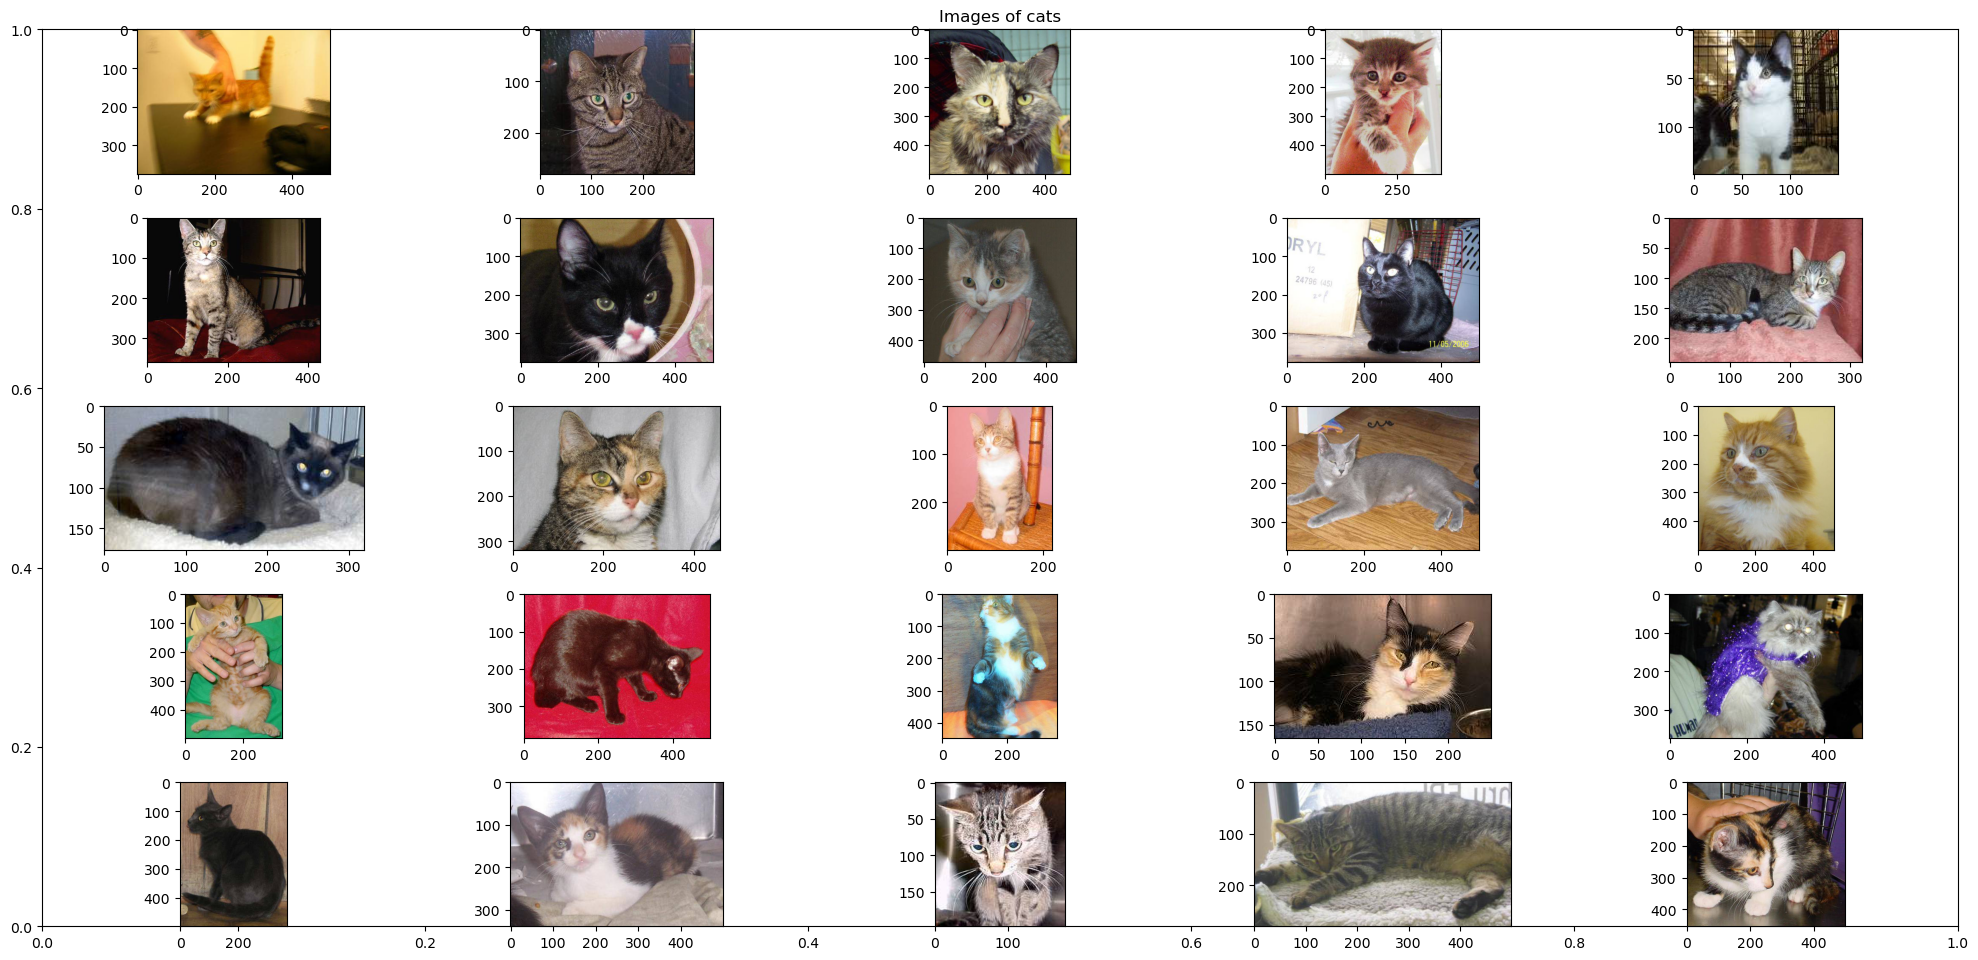

In [14]:
rows = 5
cols = 5
i = 0
axes = []
fig = plt.figure(figsize=(20,10))
plt.title("Images of cats")

for a in range(rows*cols):
    b = mpimg.imread(train_cats_dir[i])
    axes.append(fig.add_subplot(rows,cols,a+1))
    plt.imshow(b)
    i+=1

fig.tight_layout()
plt.show()

In [15]:
train, test_val = train_test_split(dataset, test_size=0.2, stratify = dataset['target'], random_state=20)
test, val = train_test_split(test_val, test_size = 0.5, stratify = test_val['target'],random_state=20)

In [16]:
train.shape , test_val.shape

((20000, 2), (5000, 2))

In [17]:
test.shape , val.shape

((2500, 2), (2500, 2))

In [18]:
target_distribution = test['target'].value_counts()
target_distribution

target
cat    1250
dog    1250
Name: count, dtype: int64

In [19]:
TEST_DIR  ="test1/"
test_images = [TEST_DIR+i for i in os.listdir(TEST_DIR)]

In [22]:
dataset

,image_path,target
0,C:/Users/USER/OneDrive/Desktop/prodigy/train/t...,cat
1,C:/Users/USER/OneDrive/Desktop/prodigy/train/t...,cat
2,C:/Users/USER/OneDrive/Desktop/prodigy/train/t...,cat
3,C:/Users/USER/OneDrive/Desktop/prodigy/train/t...,cat
4,C:/Users/USER/OneDrive/Desktop/prodigy/train/t...,cat
...,...,...
24995,C:/Users/USER/OneDrive/Desktop/prodigy/train/t...,dog
24996,C:/Users/USER/OneDrive/Desktop/prodigy/train/t...,dog
24997,C:/Users/USER/OneDrive/Desktop/prodigy/train/t...,dog
24998,C:/Users/USER/OneDrive/Desktop/prodigy/train/t...,dog


In [21]:
def preprocess_images(image_path):
    img = imread(image_path)
    img = resize(img, (50,50))
    img_flat = img.flatten()
    return img_flat

X = []
y = dataset['target']
for image_path in dataset['image_path']:
    X.append(preprocess_images(image_path))
X = np.array(X)

pca = PCA(n_components=100)
X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=20)

model = svm.SVC(kernel='rbf')

model.fit(X_train, y_train)

SVC()

In [23]:
y_pred = model.predict(X_test)

accuracy = metrics.accuracy_score(y_pred, y_test)
print("Accuracy : ",accuracy)

Accuracy :  0.6656
